<a href="https://colab.research.google.com/github/AlienX77-cmd/KU-Data-Mining/blob/main/6310505688_Imbalanced_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# กิตติภัค วิบูลเสถียร 6310505688
# Kittipak Wibulsthien 6310505688
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

##**1. Importing dataset**

In [ ]:
# Upload files
from google.colab import files
uploaded = files.upload()

In [ ]:
df = pd.read_csv("customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

##**2. Exploring dataset**

In [ ]:
# - Give summary statistics of your dataset (Numerical Columns)
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.describe(include="all")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Convert Total Charges to numerical
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'] , errors='coerce')

In [ ]:
# Extracting numerical and categorical features
Categorical_Columns = list(df.select_dtypes(include=['object']).columns)
print('Categorical Columns:\n {}'.format(Categorical_Columns))

Numerical_Columns = list(df.select_dtypes(include=['int64', 'float64']).columns)
print('Numerical Columns:\n {}'.format(Numerical_Columns))

Categorical Columns:
 ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
Numerical Columns:
 ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


###**2.1) Numerical Features**

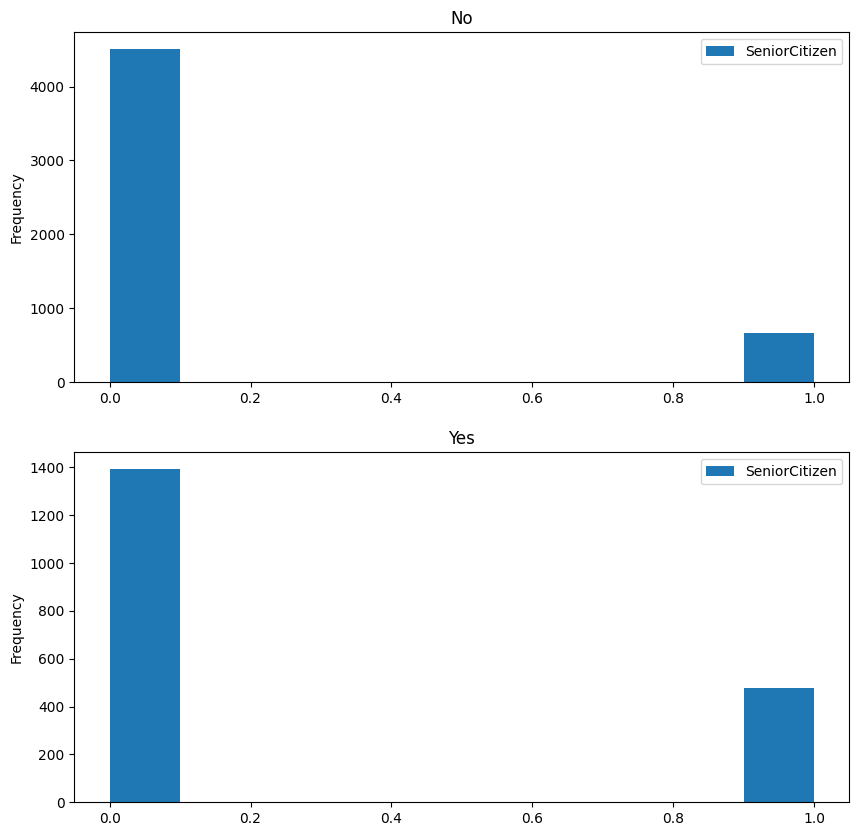

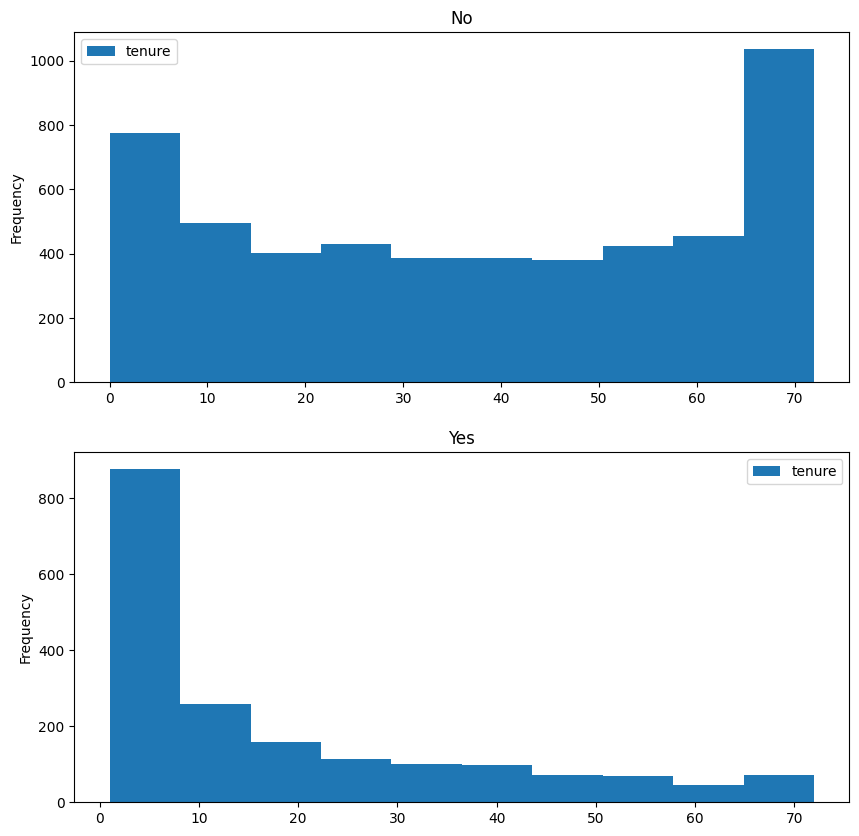

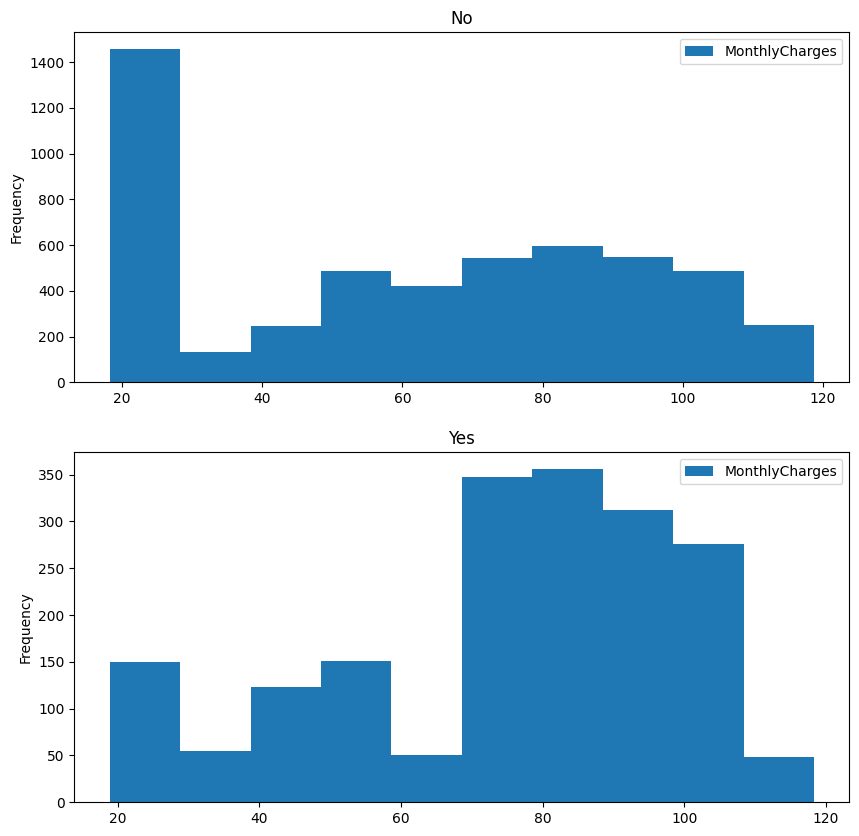

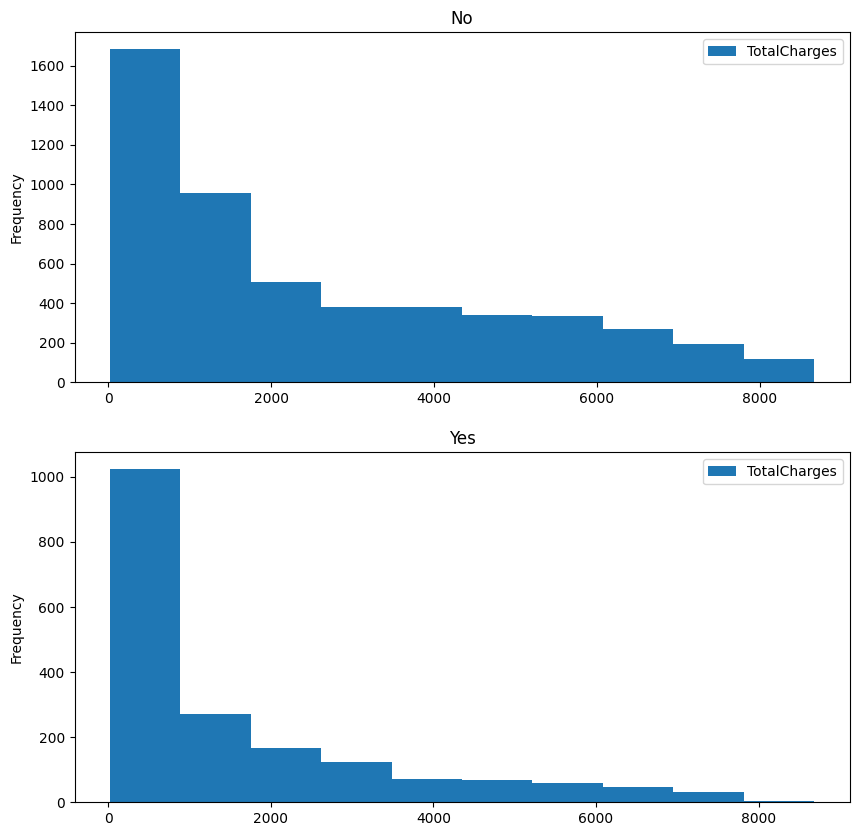

In [ ]:
# Construct a histogram of each numerical variables, with an overlay of the target variable.
for feature in Numerical_Columns:
    if feature == "Churn": continue
    df.plot.hist(column=feature, by="Churn", figsize=(10, 10))

   SeniorCitizen      Ratio
0           5901  83.785319
1           1142  16.214681
____________________________________________________________


<ipython-input-151-36b78a8dda02>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




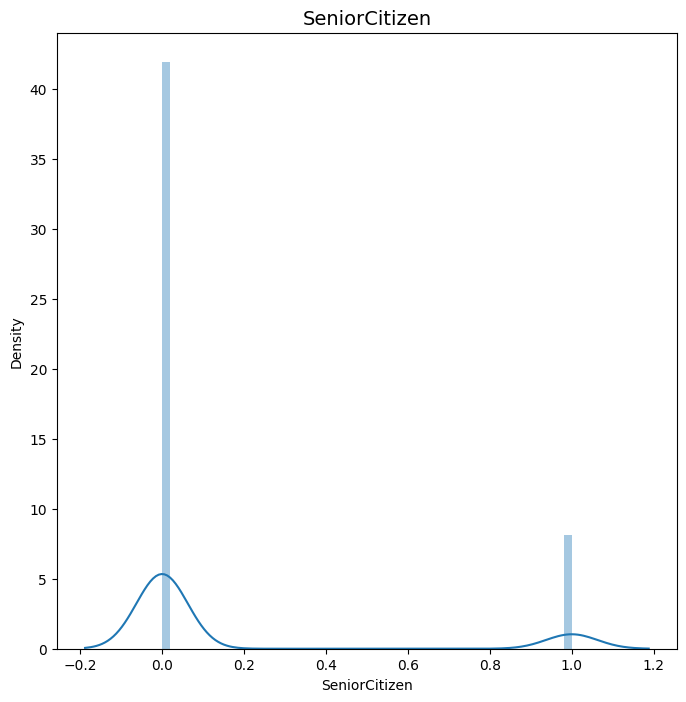

    tenure     Ratio
1      613  8.703677
72     362  5.139855
2      238  3.379242
3      200  2.839699
4      176  2.498935
..     ...       ...
28      57  0.809314
39      56  0.795116
44      51  0.724123
36      50  0.709925
0       11  0.156183

[73 rows x 2 columns]
____________________________________________________________


<ipython-input-151-36b78a8dda02>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




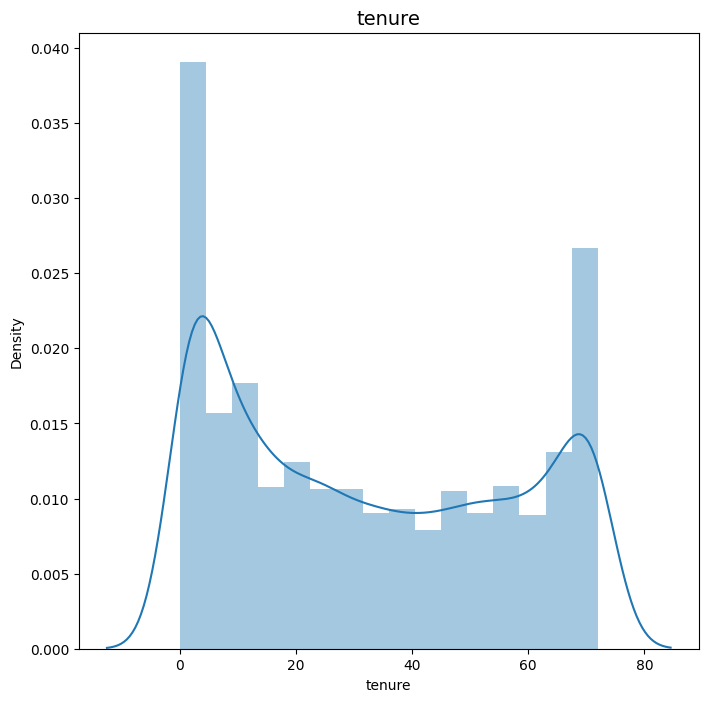

        MonthlyCharges     Ratio
20.05               61  0.866108
19.85               45  0.638932
19.95               44  0.624734
19.90               44  0.624734
20.00               43  0.610535
...                ...       ...
23.65                1  0.014198
114.70               1  0.014198
43.65                1  0.014198
87.80                1  0.014198
78.70                1  0.014198

[1585 rows x 2 columns]
____________________________________________________________


<ipython-input-151-36b78a8dda02>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




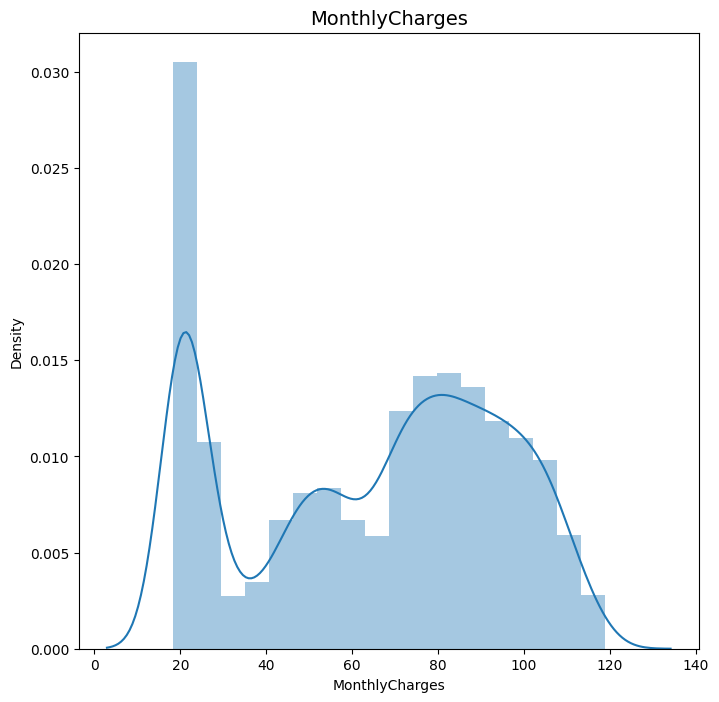

         TotalCharges     Ratio
20.20              11  0.156183
19.75               9  0.127786
20.05               8  0.113588
19.90               8  0.113588
19.65               8  0.113588
...               ...       ...
6849.40             1  0.014198
692.35              1  0.014198
130.15              1  0.014198
3211.90             1  0.014198
6844.50             1  0.014198

[6530 rows x 2 columns]
____________________________________________________________


<ipython-input-151-36b78a8dda02>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




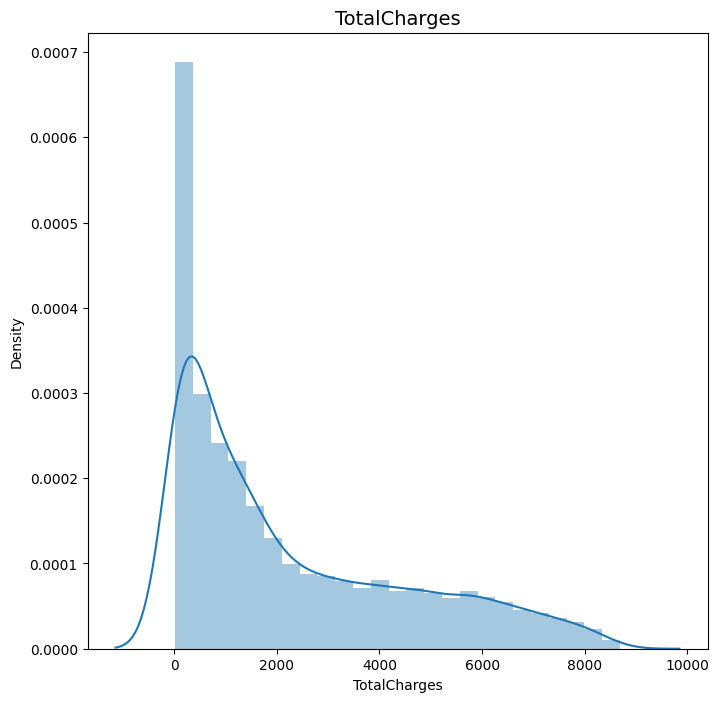

In [ ]:
# Distribution Plot
for feature in Numerical_Columns:
    print(pd.DataFrame({feature: df[feature].value_counts(), "Ratio": 100 * df[feature].value_counts() / len(df)}))
    print("____________________________________________________________")
    plt.figure(figsize=(8, 8))
    plt.title(feature,fontsize=14)
    sns.distplot(df[feature])
    plt.show()

SeniorCitizen vs tenure


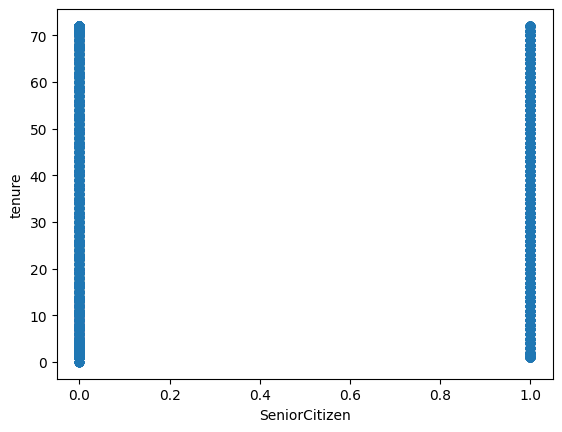



SeniorCitizen vs MonthlyCharges


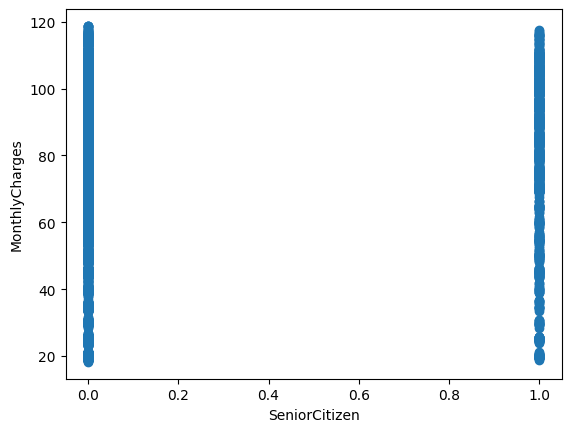



SeniorCitizen vs TotalCharges


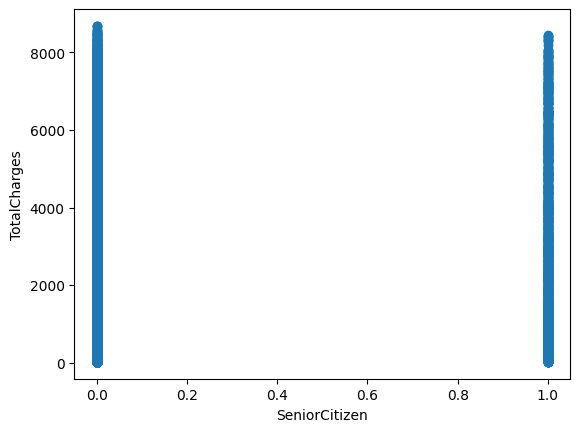



tenure vs MonthlyCharges


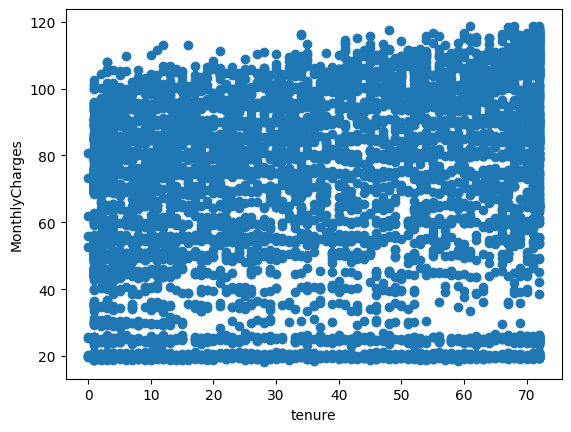



tenure vs TotalCharges


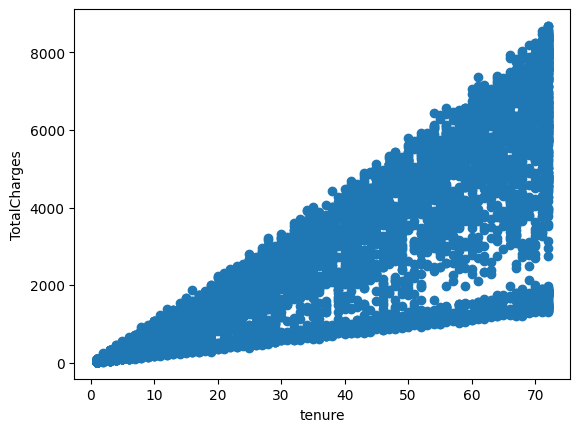



MonthlyCharges vs TotalCharges


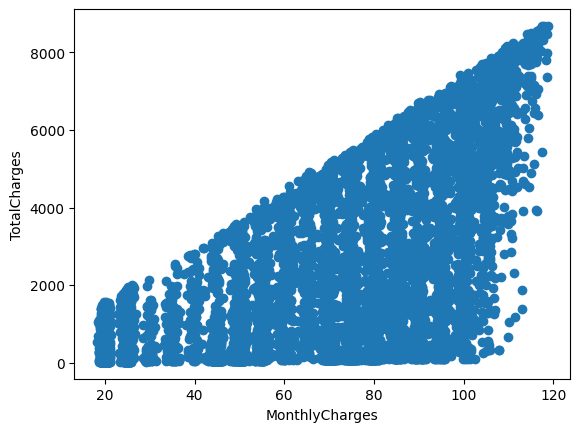

In [ ]:
# Scatter Plot
# For each pair of numerical variables, construct a scatter plot of the variables.
temp = []
for i in Numerical_Columns:
  for j in Numerical_Columns:
    if (i == j): continue
    temp.append(i)
    if (j in temp): continue
    print(i, "vs", j)
    plt.xlabel(i)
    plt.ylabel(j)
    plt.scatter(x=df[i], y=df[j])
    plt.show()
    print("\n")

<Axes: >

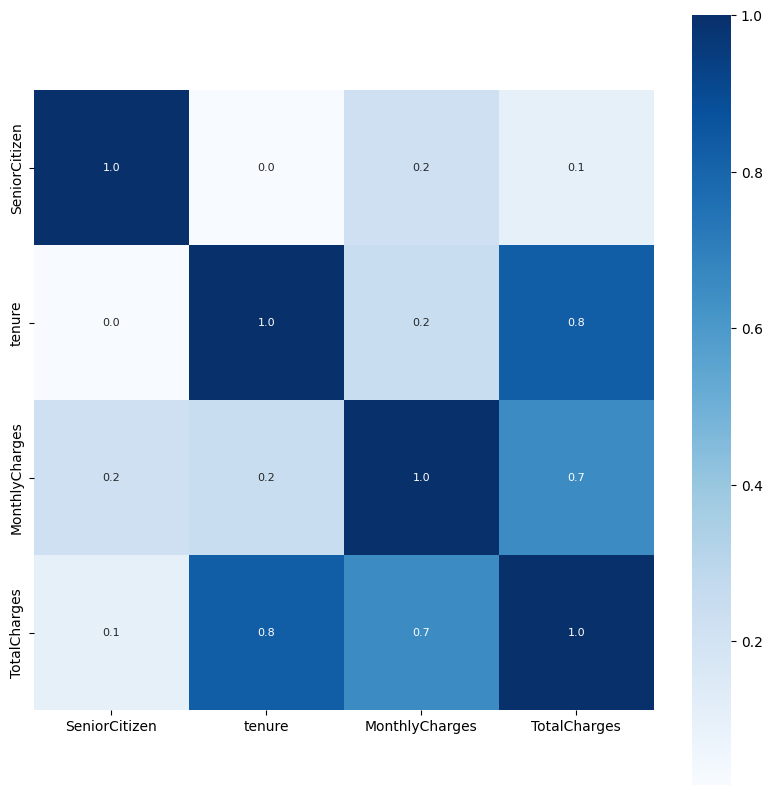

In [ ]:
# Correlation
# Constructing a Heatmap to understand the correlation

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

###**2.2) Categorical Features**

        gender     Ratio
Male      3555  50.47565
Female    3488  49.52435
____________________________________________________________


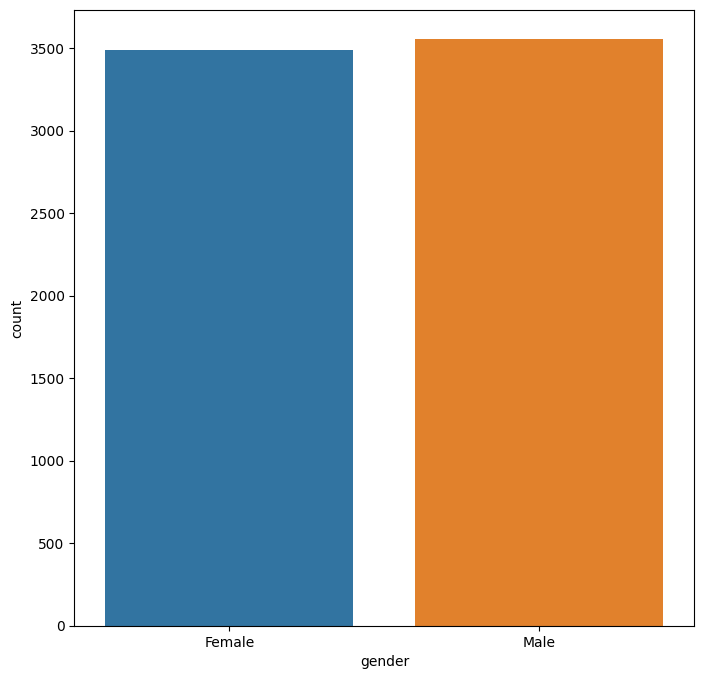


     Partner     Ratio
No      3641  51.69672
Yes     3402  48.30328
____________________________________________________________


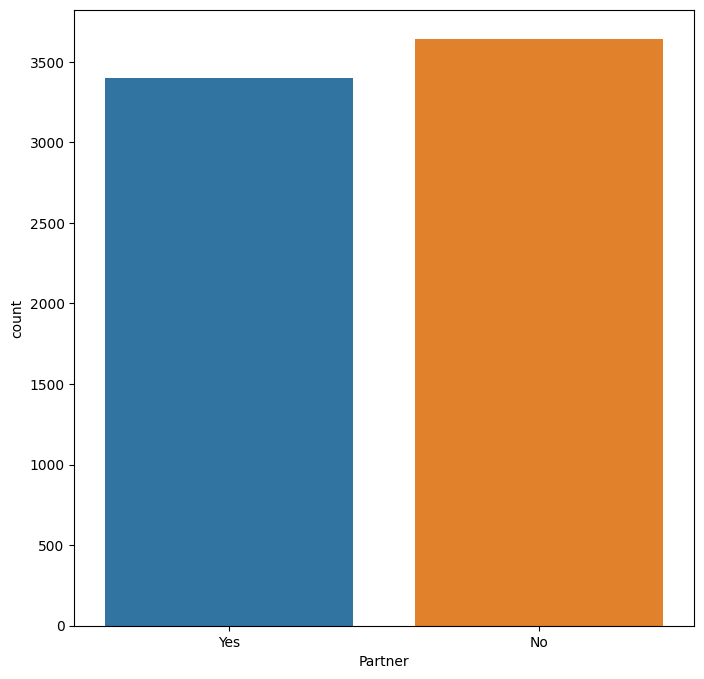


     Dependents      Ratio
No         4933  70.041176
Yes        2110  29.958824
____________________________________________________________


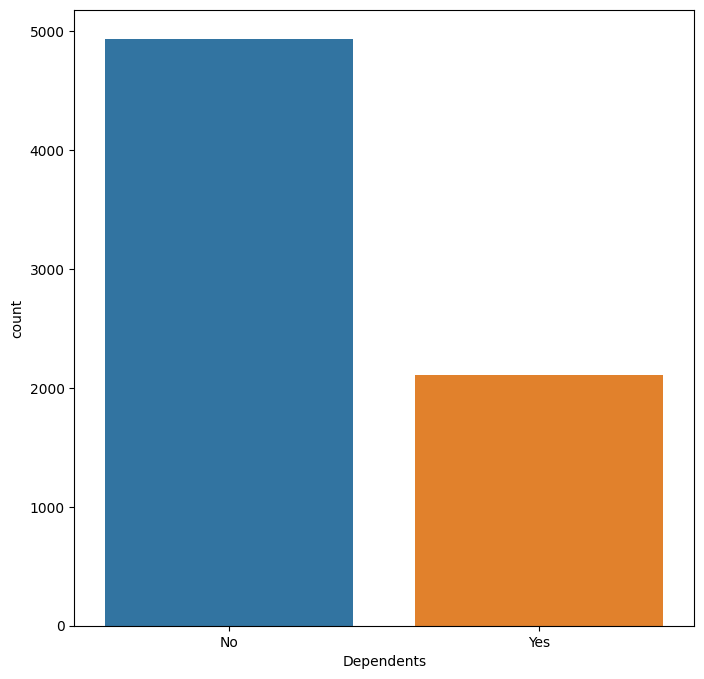


     PhoneService      Ratio
Yes          6361  90.316626
No            682   9.683374
____________________________________________________________


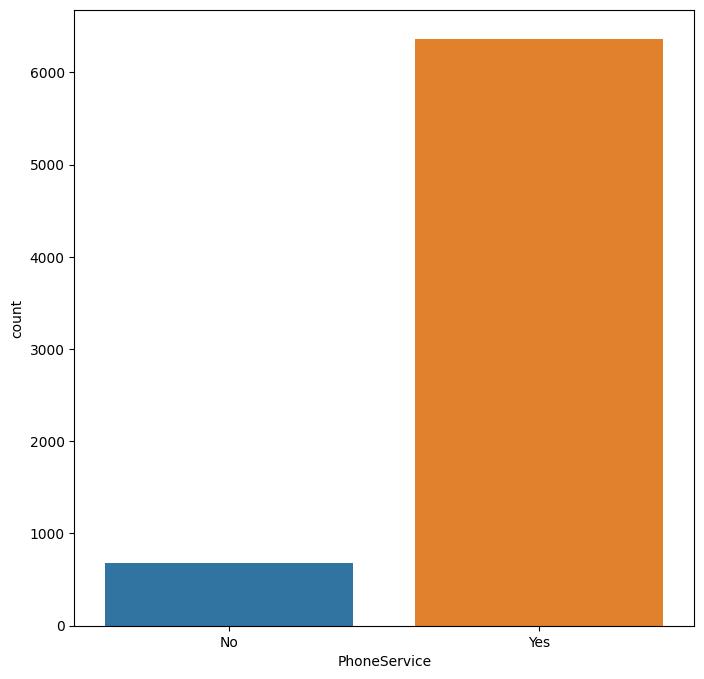


                  MultipleLines      Ratio
No                         3390  48.132898
Yes                        2971  42.183729
No phone service            682   9.683374
____________________________________________________________


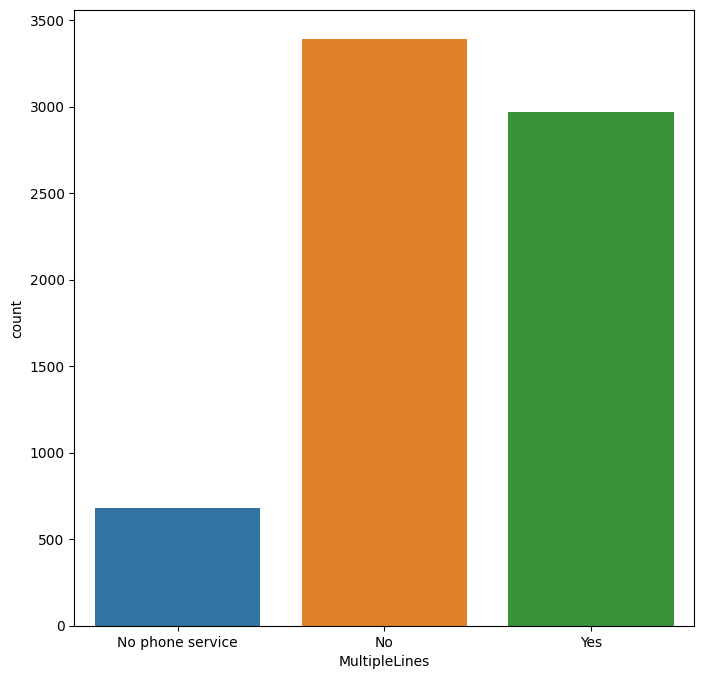


             InternetService      Ratio
Fiber optic             3096  43.958540
DSL                     2421  34.374556
No                      1526  21.666903
____________________________________________________________


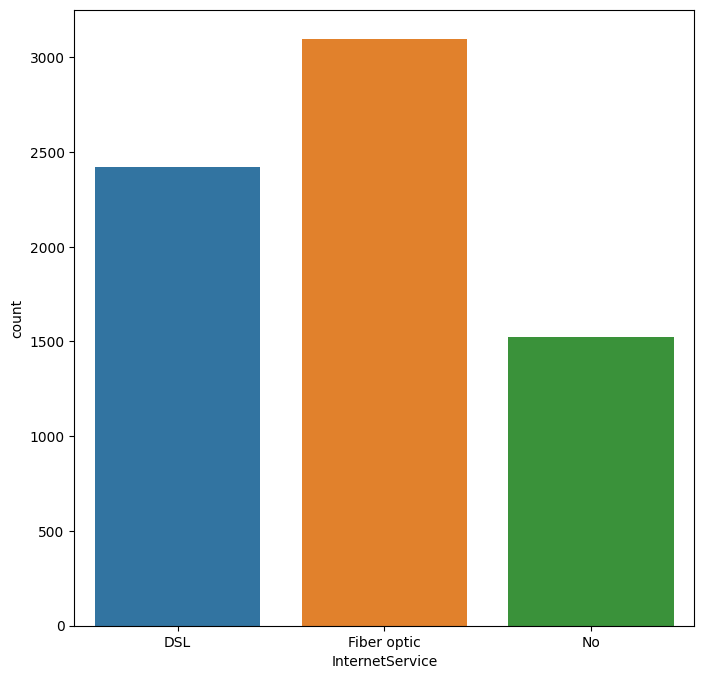


                     OnlineSecurity      Ratio
No                             3498  49.666335
Yes                            2019  28.666761
No internet service            1526  21.666903
____________________________________________________________


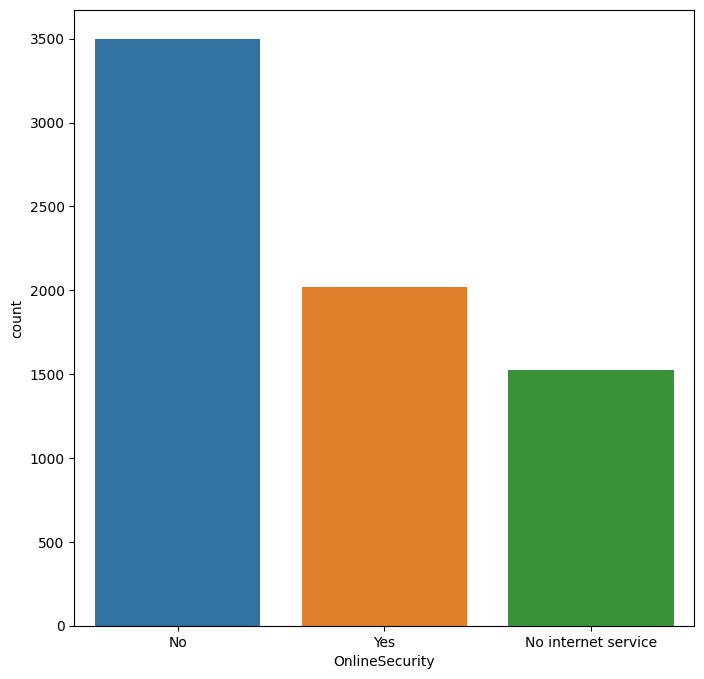


                     OnlineBackup      Ratio
No                           3088  43.844952
Yes                          2429  34.488144
No internet service          1526  21.666903
____________________________________________________________


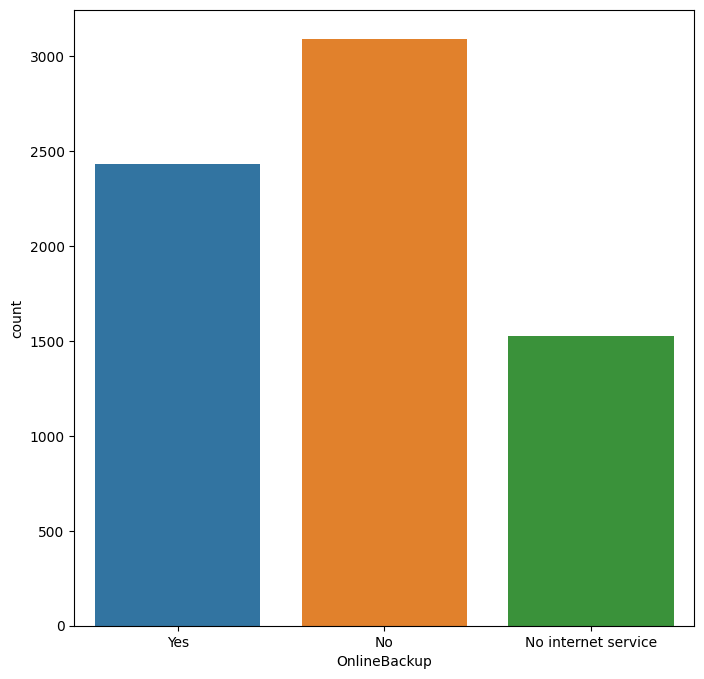


                     DeviceProtection      Ratio
No                               3095  43.944342
Yes                              2422  34.388755
No internet service              1526  21.666903
____________________________________________________________


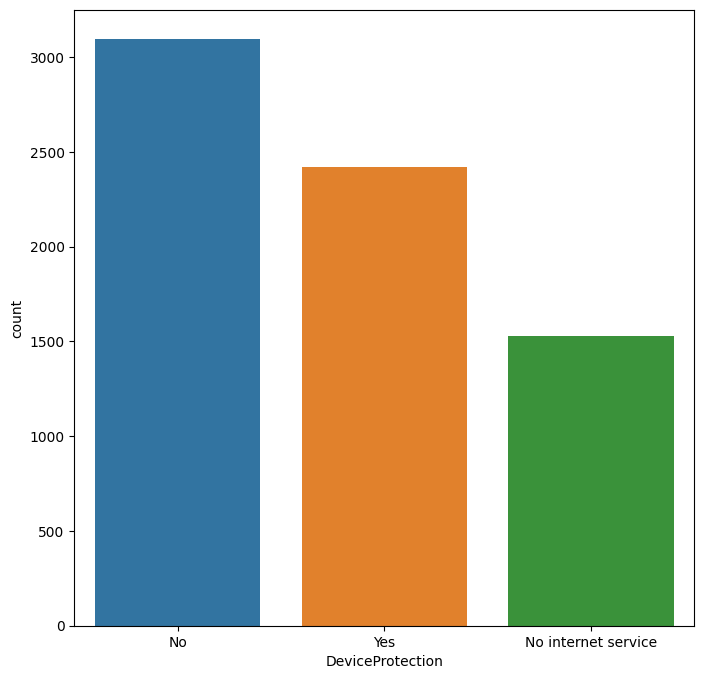


                     TechSupport      Ratio
No                          3473  49.311373
Yes                         2044  29.021724
No internet service         1526  21.666903
____________________________________________________________


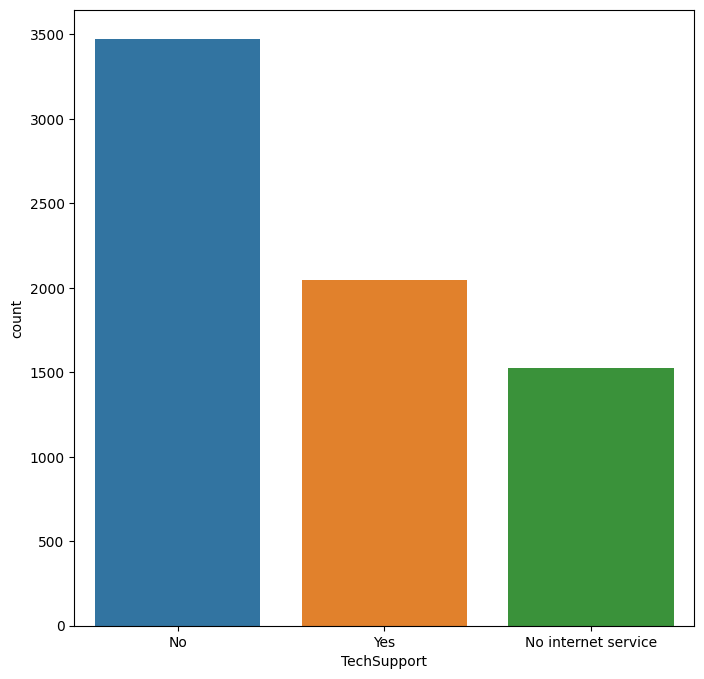


                     StreamingTV      Ratio
No                          2810  39.897771
Yes                         2707  38.435326
No internet service         1526  21.666903
____________________________________________________________


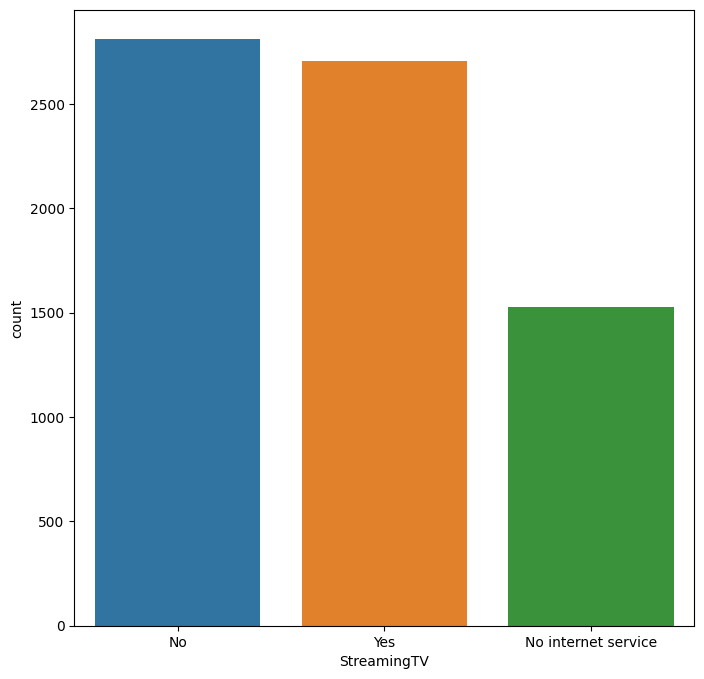


                     StreamingMovies      Ratio
No                              2785  39.542808
Yes                             2732  38.790288
No internet service             1526  21.666903
____________________________________________________________


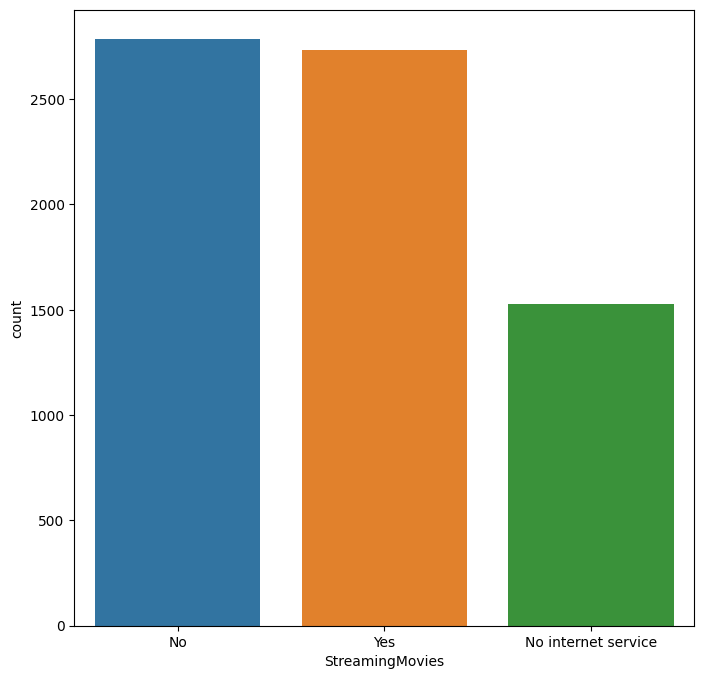


                Contract      Ratio
Month-to-month      3875  55.019168
Two year            1695  24.066449
One year            1473  20.914383
____________________________________________________________


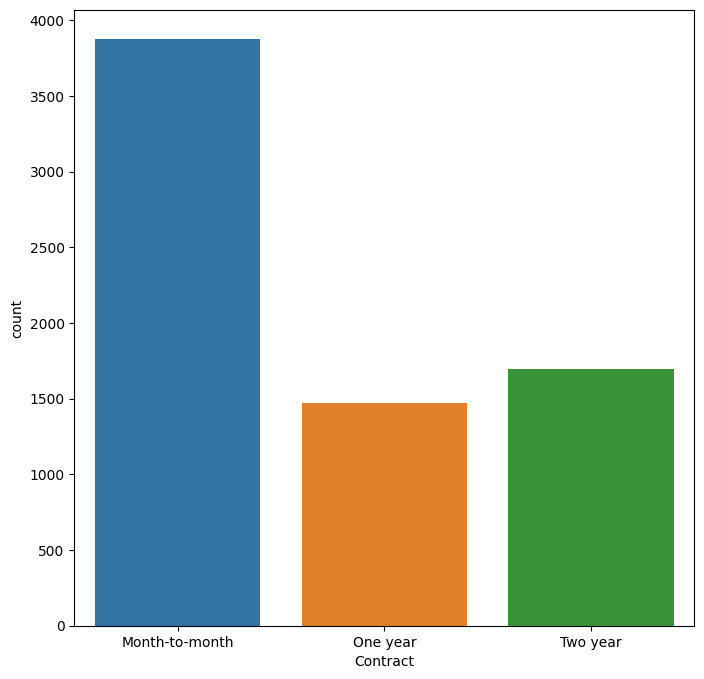


     PaperlessBilling      Ratio
Yes              4171  59.221922
No               2872  40.778078
____________________________________________________________


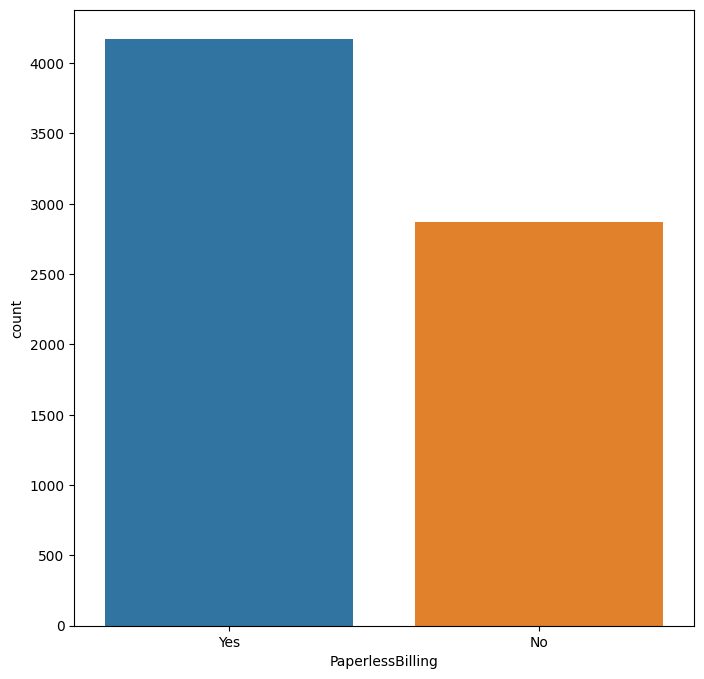


                           PaymentMethod      Ratio
Electronic check                    2365  33.579441
Mailed check                        1612  22.887974
Bank transfer (automatic)           1544  21.922476
Credit card (automatic)             1522  21.610109
____________________________________________________________


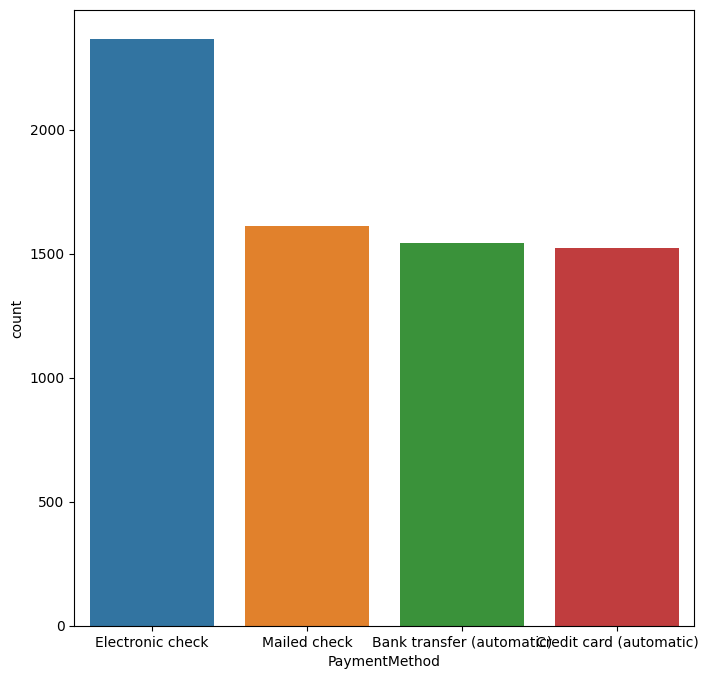


     Churn      Ratio
No    5174  73.463013
Yes   1869  26.536987
____________________________________________________________


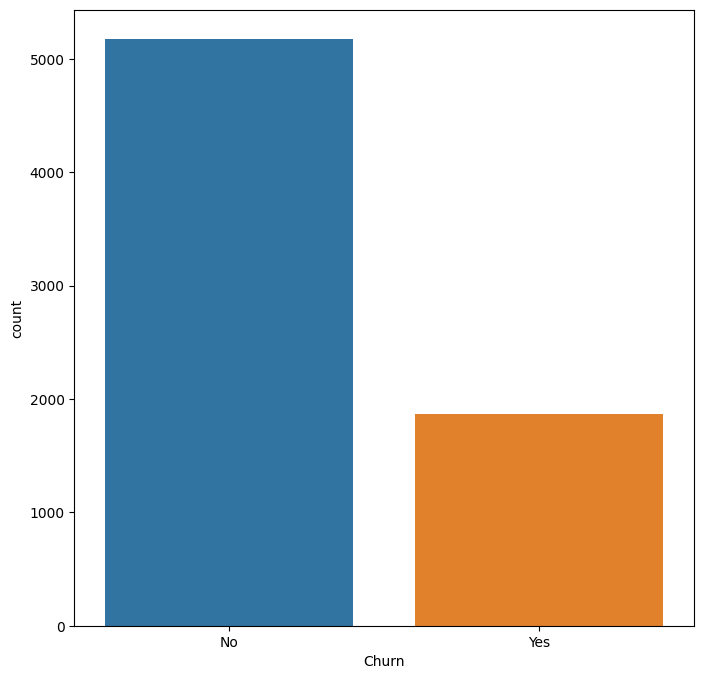

In [ ]:
# Categorical Columns
for feature in Categorical_Columns:
  if (feature == "customerID"): continue
  print(pd.DataFrame({feature: df[feature].value_counts(), "Ratio": 100 * df[feature].value_counts() / len(df)}))
  print("____________________________________________________________")
  plt.figure(figsize=(8,8))
  sns.countplot(x = feature, data = df)
  plt.show()
  print()

In [ ]:
import plotly.express as px
# Overall Churn Rate
total_customers = len(df)
churned_customers = len(df[df['Churn'] == 'Yes'])
churn_rate = (churned_customers / total_customers) * 100

print("Overall churn rate:", churn_rate, "%")

fig = px.pie(values=[churn_rate, 100 - churn_rate], names=['Churned', 'Retained'],title='Overall Churn Rate')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Overall churn rate: 26.536987079369588 %


##**3. Processing missing values and/or outliers**

In [ ]:
# Checking Null values
print(df.isnull().any())
print("\n")
print(df.isnull().sum())

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
Tot

In [ ]:
# เนื่องจาก TotalCharges มีค่า NaN อยุ่ แต่มันมีจำนวนมาก (มีเพียง 11 แถวเท่านั้น จาก 7043 แถว) ผมจึงคิดว่าเราสามารถ drop มันไปได้ครับ
df.dropna(inplace = True)

In [ ]:
# Checking Null values
print(df.isnull().any())
print("\n")
print(df.isnull().sum())

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0


###**3.1) Boxplot**

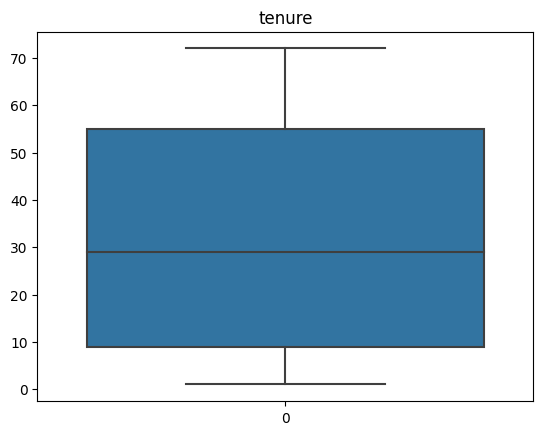

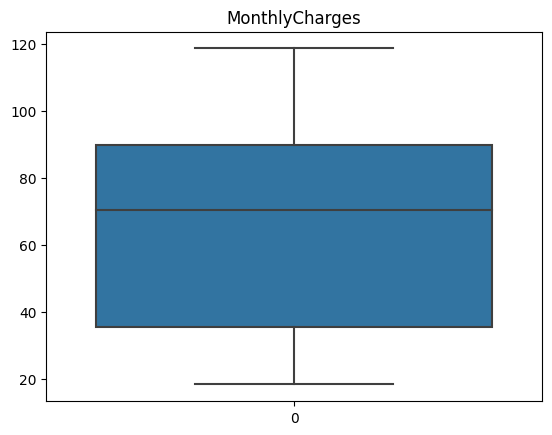

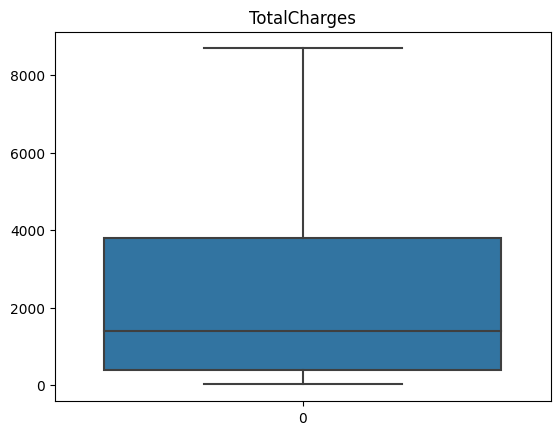

In [ ]:
# Using Box Plot to see Outliers
for feature in Numerical_Columns:
  if (feature == "SeniorCitizen"): continue #SeniorCitizen is either 0 or 1
  plt.title(feature,fontsize=12)
  sns.boxplot(df[feature])
  plt.show()

No outliers are detected

##**4. Processing categorical data or numerical data**


###**Transformation for Categorical to Numerical**


In [ ]:
df_clean = df.copy()

In [ ]:
# เนื่องจาก dataset นี้มี features จำนวนมาก เราจึงใช้ LabelEncoder แทนเพื่อป้องกันการเกิด Curse of Dimensionality
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for feature in Categorical_Columns:
  if feature == 'Churn': continue
  df_clean[feature] = encoder.fit_transform(df_clean[feature])

In [ ]:
df_clean.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,No
1,3953,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,No
2,2558,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,Yes
3,5524,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,No
4,6500,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,Yes


In [ ]:
df_clean.drop("customerID", axis = 1, inplace = True)

In [ ]:
df_clean.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,No
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,No
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,Yes
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,No
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,Yes


##**5. Feature Scaling**

In [ ]:
X = df_clean.iloc[:, :-1].values # Don't include the target variable (Churn)
Y = df_clean.iloc[:, -1].values # All rows but only the last column (-1) => Y keeps the target variable
print(X)
print(Y)

[[0.0000e+00 0.0000e+00 1.0000e+00 ... 2.0000e+00 2.9850e+01 2.9850e+01]
 [1.0000e+00 0.0000e+00 0.0000e+00 ... 3.0000e+00 5.6950e+01 1.8895e+03]
 [1.0000e+00 0.0000e+00 0.0000e+00 ... 3.0000e+00 5.3850e+01 1.0815e+02]
 ...
 [0.0000e+00 0.0000e+00 1.0000e+00 ... 2.0000e+00 2.9600e+01 3.4645e+02]
 [1.0000e+00 1.0000e+00 1.0000e+00 ... 3.0000e+00 7.4400e+01 3.0660e+02]
 [1.0000e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 1.0565e+02 6.8445e+03]]
['No' 'No' 'Yes' ... 'No' 'Yes' 'No']


In [ ]:
print("X shape = ", X.shape, ", Y shape = ",Y.shape)

X shape =  (7032, 19) , Y shape =  (7032,)


In [ ]:
# Encoding the Dependent Variable (The Target Variable - loan_status)

from sklearn.preprocessing import LabelEncoder
enconder = LabelEncoder()
Y = encoder.fit_transform(Y)

print(Y)

[0 0 1 ... 0 1 0]


In [ ]:
# Feature Scaling the input data (X)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)

###**5.1) Use cross-validation, and build a model to predict churn rate. It can be any kind of model, or it could be a model that you haven't seen in the class.**

In [ ]:
# Importing the models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

**5.1.1) Comparing the models with default hyperparameter values using Cross Validation**

Once the model is built,
- Show the confusion-matrix
- Analyze precision, recall and f1-score of the two classes.

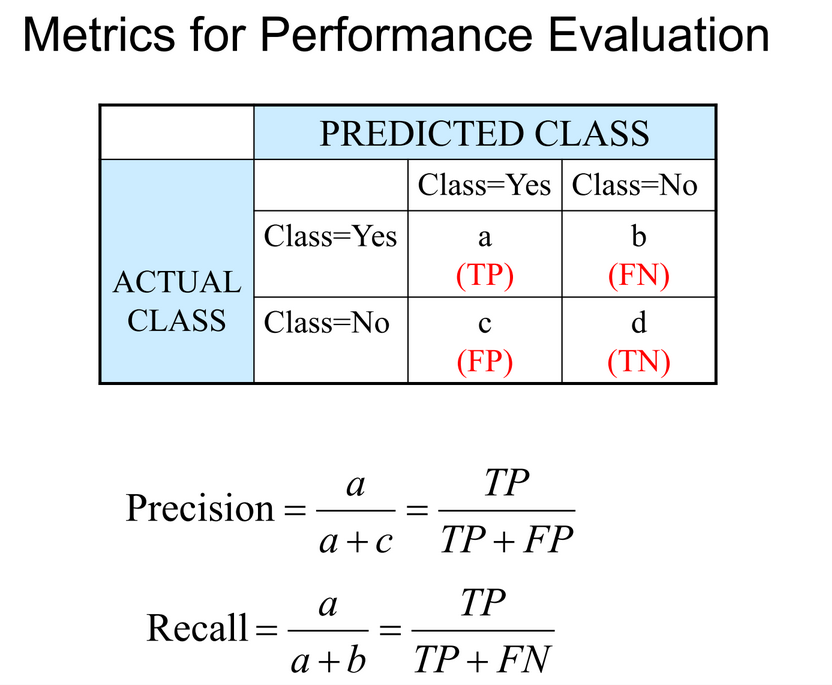

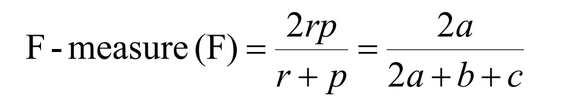

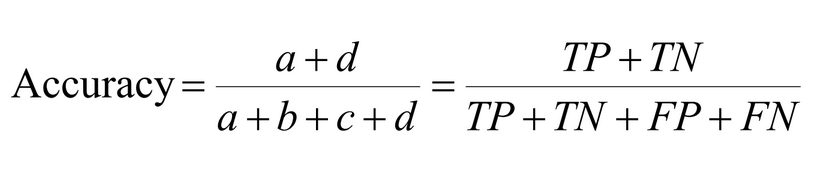

Credit: picture from Assoc. Prof.Dr.Kitsana Waiyamai's slide

โดยในที่นี้เราจะลองใช้ 3 model คือ Logistic Regression, KNeighborsClassifier และ Random Forest Classifier โดยเราจะทำการใช้ Cross Validation ในการ train และ test เพื่อหา accuracy ของแต่ละโมเดลทีละโมเดลครับ

1) LogisticRegression(max_iter=1000)
Cross Validation accuracies for the LogisticRegression(max_iter=1000) = [0.80454869 0.80881308 0.78520626 0.80512091 0.8029872 ]
Accuracy score of the LogisticRegression(max_iter=1000) = 80.13 %
Confusion Matrix for the LogisticRegression(max_iter=1000) =
 [[4619  544]
 [ 853 1016]]


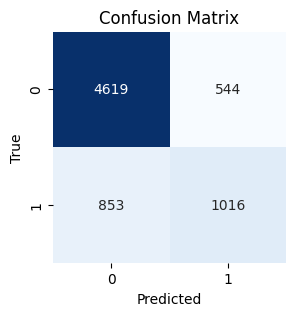

Precision: 0.65
Recall: 0.54
F1-score: 0.59
-------------------------------------------------------------------------------------------------------------------------------


2) KNeighborsClassifier()
Cross Validation accuracies for the KNeighborsClassifier() = [0.76687989 0.75764037 0.73897582 0.74324324 0.75817923]
Accuracy score of the KNeighborsClassifier() = 75.3 %
Confusion Matrix for the KNeighborsClassifier() =
 [[4365  798]
 [ 939  930]]


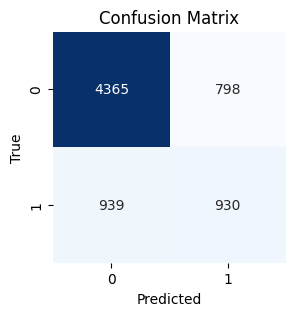

Precision: 0.54
Recall: 0.50
F1-score: 0.52
-------------------------------------------------------------------------------------------------------------------------------


3) RandomForestClassifier(random_state=0)
Cross Validation accuracies for the RandomForestClassifier(random_state=0) = [0.79104478 0.79744136 0.77596017 0.80583215 0.79658606]
Accuracy score of the RandomForestClassifier(random_state=0) = 79.34 %
Confusion Matrix for the RandomForestClassifier(random_state=0) =
 [[4665  498]
 [ 955  914]]


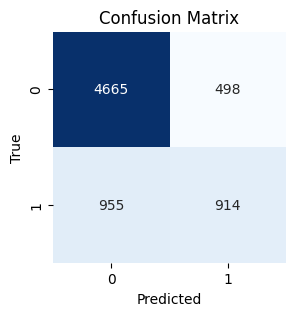

Precision: 0.65
Recall: 0.49
F1-score: 0.56
-------------------------------------------------------------------------------------------------------------------------------




In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score

# List of models
models = [LogisticRegression(max_iter=1000), KNeighborsClassifier(), RandomForestClassifier(random_state=0)]

def compare_models_cross_validation():
    i = 1
    for model in models:
      # Using cross validation and calculate the accuracy for each model
      print(f'{i}) {model}')
      cv_score = cross_val_score(model, X, Y, cv=5)
      mean_accuracy = sum(cv_score) / len(cv_score)
      mean_accuracy *= 100
      mean_accuracy = round(mean_accuracy, 2)

      # Calculate confusion matrix using cross_val_predict
      predicted = cross_val_predict(model, X, Y, cv=5)
      conf_matrix = confusion_matrix(Y, predicted)

      print('Cross Validation accuracies for the', model, '=', cv_score)
      print('Accuracy score of the', model, '=', mean_accuracy, '%')
      print('Confusion Matrix for the', model, '=\n', conf_matrix)

      # Plot the confusion matrix
      plt.figure(figsize=(3, 3))
      sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
      plt.xlabel("Predicted")
      plt.ylabel("True")
      plt.title("Confusion Matrix")
      plt.show()

      # Calculate precision, recall, and F1-score
      precision = precision_score(Y, predicted)
      recall = recall_score(Y, predicted)
      f1 = f1_score(Y, predicted)

      print(f'Precision: {precision:.2f}')
      print(f'Recall: {recall:.2f}')
      print(f'F1-score: {f1:.2f}')

      i += 1

      print('-------------------------------------------------------------------------------------------------------------------------------')
      print('\n')

compare_models_cross_validation()

###**5.2) Improve f1-score of the minority class using**
- Under-sampling
- Over-sampling by duplication the minority class
- Over-sampling by SMOTE
- Compare performance from the three techniques

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

####**Under-Sampling Method**

1) LogisticRegression(max_iter=1000)
Cross Validation accuracies for the LogisticRegression(max_iter=1000) = [0.77941176 0.78475936 0.77406417 0.76572959 0.75769746]
Accuracy score of the LogisticRegression(max_iter=1000) = 77.23 %
Confusion Matrix for the LogisticRegression(max_iter=1000) =
 [[1370  499]
 [ 352 1517]]


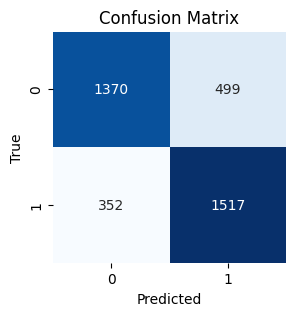

F1-score after under-sampling: 0.78
-------------------------------------------------------------------------------------------------------------------------------


2) KNeighborsClassifier()
Cross Validation accuracies for the KNeighborsClassifier() = [0.71390374 0.7459893  0.71390374 0.73360107 0.73360107]
Accuracy score of the KNeighborsClassifier() = 72.82 %
Confusion Matrix for the KNeighborsClassifier() =
 [[1228  641]
 [ 375 1494]]


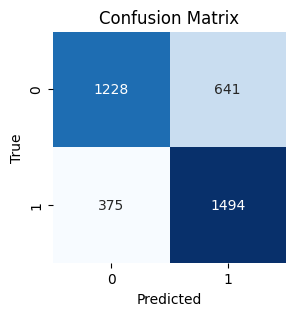

F1-score after under-sampling: 0.75
-------------------------------------------------------------------------------------------------------------------------------


3) RandomForestClassifier(random_state=0)
Cross Validation accuracies for the RandomForestClassifier(random_state=0) = [0.77941176 0.74331551 0.74465241 0.74832664 0.75368139]
Accuracy score of the RandomForestClassifier(random_state=0) = 75.39 %
Confusion Matrix for the RandomForestClassifier(random_state=0) =
 [[1390  479]
 [ 441 1428]]


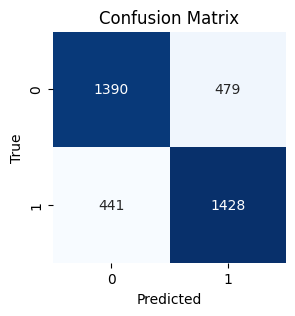

F1-score after under-sampling: 0.76
-------------------------------------------------------------------------------------------------------------------------------




In [ ]:
# Under-Sampling Method

# List of models
models = [LogisticRegression(max_iter=1000), KNeighborsClassifier(), RandomForestClassifier(random_state=0)]

performance_of_under_sampling = {}

# Under-sampling
under_sampler = RandomUnderSampler(sampling_strategy = 'majority')
X_resampled, Y_resampled = under_sampler.fit_resample(X, Y)

def compare_models_cross_validation_after_undersampling():
    i = 1
    for model in models:
      print(f'{i}) {model}')
      cv_score = cross_val_score(model, X_resampled, Y_resampled, cv=5)
      mean_accuracy = sum(cv_score) / len(cv_score)
      mean_accuracy *= 100
      mean_accuracy = round(mean_accuracy, 2)

      # Calculate confusion matrix using cross_val_predict
      predicted = cross_val_predict(model, X_resampled, Y_resampled, cv=5)
      conf_matrix = confusion_matrix(Y_resampled, predicted)

      print('Cross Validation accuracies for the', model, '=', cv_score)
      print('Accuracy score of the', model, '=', mean_accuracy, '%')
      print('Confusion Matrix for the', model, '=\n', conf_matrix)

      # Plot the confusion matrix
      plt.figure(figsize=(3, 3))
      sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
      plt.xlabel("Predicted")
      plt.ylabel("True")
      plt.title("Confusion Matrix")
      plt.show()

      # Calculate F1-score
      f1 = f1_score(Y_resampled, predicted)
      print(f'F1-score after under-sampling: {f1:.2f}')

      performance_of_under_sampling.update({model: f1})
      i += 1

      print('-------------------------------------------------------------------------------------------------------------------------------')
      print('\n')

compare_models_cross_validation_after_undersampling()

In [ ]:
# F1-score after Under-Sampling the data
for key, value in performance_of_under_sampling.items():
    print(f'Key: {key}, Value: {value}')

Key: LogisticRegression(max_iter=1000), Value: 0.780952380952381
Key: KNeighborsClassifier(), Value: 0.7462537462537463
Key: RandomForestClassifier(random_state=0), Value: 0.7563559322033898


####**Over-Sampling Method**

1) LogisticRegression(max_iter=1000)
Cross Validation accuracies for the LogisticRegression(max_iter=1000) = [0.77153921 0.75690073 0.75496368 0.77675545 0.77772397]
Accuracy score of the LogisticRegression(max_iter=1000) = 76.76 %
Confusion Matrix for the LogisticRegression(max_iter=1000) =
 [[3749 1414]
 [ 986 4177]]


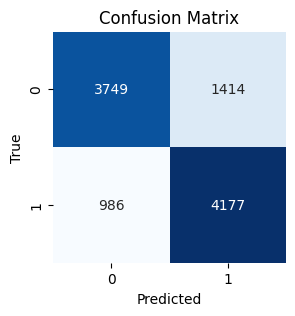

F1-score after over-sampling: 0.78
-------------------------------------------------------------------------------------------------------------------------------


2) KNeighborsClassifier()
Cross Validation accuracies for the KNeighborsClassifier() = [0.74298161 0.74527845 0.76561743 0.77239709 0.78498789]
Accuracy score of the KNeighborsClassifier() = 76.23 %
Confusion Matrix for the KNeighborsClassifier() =
 [[3403 1760]
 [ 695 4468]]


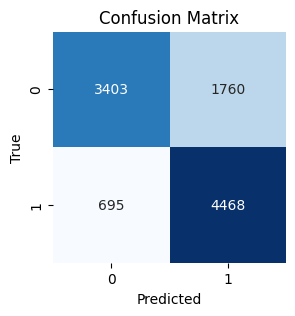

F1-score after over-sampling: 0.78
-------------------------------------------------------------------------------------------------------------------------------


3) RandomForestClassifier(random_state=0)
Cross Validation accuracies for the RandomForestClassifier(random_state=0) = [0.88238141 0.88668281 0.90556901 0.91767554 0.92106538]
Accuracy score of the RandomForestClassifier(random_state=0) = 90.27 %
Confusion Matrix for the RandomForestClassifier(random_state=0) =
 [[4310  853]
 [ 152 5011]]


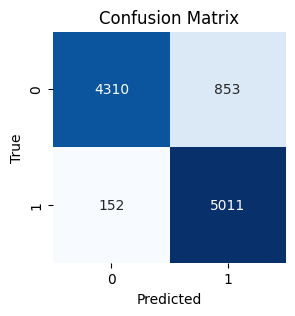

F1-score after over-sampling: 0.91
-------------------------------------------------------------------------------------------------------------------------------




In [ ]:
# Over-Sampling Method

# List of models
models = [LogisticRegression(max_iter=1000), KNeighborsClassifier(), RandomForestClassifier(random_state=0)]

performance_of_over_sampling = {}

# Over-sampling
over_sampler = RandomOverSampler(sampling_strategy = 'minority') # This means that if the majority class had 1,000 examples and the minority class had 100, this strategy would oversampling the minority class so that it has 1,000 examples.
X_resampled, Y_resampled = over_sampler.fit_resample(X, Y)

def compare_models_cross_validation_after_oversampling():
    i = 1
    for model in models:
      print(f'{i}) {model}')
      cv_score = cross_val_score(model, X_resampled, Y_resampled, cv=5)
      mean_accuracy = sum(cv_score) / len(cv_score)
      mean_accuracy *= 100
      mean_accuracy = round(mean_accuracy, 2)

      # Calculate confusion matrix using cross_val_predict
      predicted = cross_val_predict(model, X_resampled, Y_resampled, cv=5)
      conf_matrix = confusion_matrix(Y_resampled, predicted)

      print('Cross Validation accuracies for the', model, '=', cv_score)
      print('Accuracy score of the', model, '=', mean_accuracy, '%')
      print('Confusion Matrix for the', model, '=\n', conf_matrix)

      # Plot the confusion matrix
      plt.figure(figsize=(3, 3))
      sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
      plt.xlabel("Predicted")
      plt.ylabel("True")
      plt.title("Confusion Matrix")
      plt.show()

      # Calculate F1-score
      f1 = f1_score(Y_resampled, predicted)
      print(f'F1-score after over-sampling: {f1:.2f}')

      performance_of_over_sampling.update({model: f1})
      i += 1

      print('-------------------------------------------------------------------------------------------------------------------------------')
      print('\n')

compare_models_cross_validation_after_oversampling()

In [ ]:
# F1-Score after Over-Sampling the data
for key, value in performance_of_over_sampling.items():
    print(f'Key: {key}, Value: {value}')

Key: LogisticRegression(max_iter=1000), Value: 0.7768272270782963
Key: KNeighborsClassifier(), Value: 0.7844789746290932
Key: RandomForestClassifier(random_state=0), Value: 0.9088600707354675


####**Over-Sampling Method Using SMOTE**

1) LogisticRegression(max_iter=1000)
Cross Validation accuracies for the LogisticRegression(max_iter=1000) = [0.76911907 0.7622276  0.77094431 0.77917676 0.78934625]
Accuracy score of the LogisticRegression(max_iter=1000) = 77.42 %
Confusion Matrix for the LogisticRegression(max_iter=1000) =
 [[3775 1388]
 [ 944 4219]]


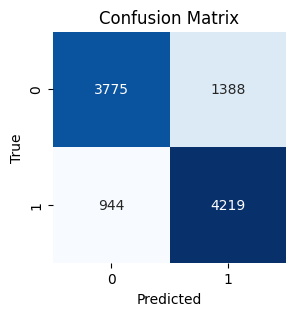

F1-score after over-sampling with SMOTE: 0.78
-------------------------------------------------------------------------------------------------------------------------------


2) KNeighborsClassifier()
Cross Validation accuracies for the KNeighborsClassifier() = [0.76815102 0.77530266 0.80435835 0.79515738 0.80145278]
Accuracy score of the KNeighborsClassifier() = 78.89 %
Confusion Matrix for the KNeighborsClassifier() =
 [[3461 1702]
 [ 478 4685]]


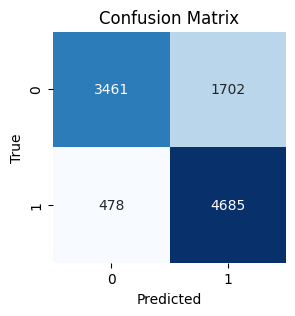

F1-score after over-sampling with SMOTE: 0.81
-------------------------------------------------------------------------------------------------------------------------------


3) RandomForestClassifier(random_state=0)
Cross Validation accuracies for the RandomForestClassifier(random_state=0) = [0.76863504 0.79661017 0.88377724 0.89297821 0.90363196]
Accuracy score of the RandomForestClassifier(random_state=0) = 84.91 %
Confusion Matrix for the RandomForestClassifier(random_state=0) =
 [[4356  807]
 [ 751 4412]]


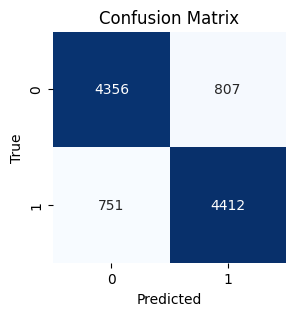

F1-score after over-sampling with SMOTE: 0.85
-------------------------------------------------------------------------------------------------------------------------------




In [ ]:
# Over-Sampling Method with SMOTE

# List of models
models = [LogisticRegression(max_iter=1000), KNeighborsClassifier(), RandomForestClassifier(random_state=0)]

performance_of_SMOTE = {}

# Over-sampling with SMOTE
smote = SMOTE(random_state=0)
X_resampled, Y_resampled = smote.fit_resample(X, Y)

def compare_models_cross_validation_after_SMOTE():
    i = 1
    for model in models:
      print(f'{i}) {model}')
      cv_score = cross_val_score(model, X_resampled, Y_resampled, cv=5)
      mean_accuracy = sum(cv_score) / len(cv_score)
      mean_accuracy *= 100
      mean_accuracy = round(mean_accuracy, 2)

      # Calculate confusion matrix using cross_val_predict
      predicted = cross_val_predict(model, X_resampled, Y_resampled, cv=5)
      conf_matrix = confusion_matrix(Y_resampled, predicted)

      print('Cross Validation accuracies for the', model, '=', cv_score)
      print('Accuracy score of the', model, '=', mean_accuracy, '%')
      print('Confusion Matrix for the', model, '=\n', conf_matrix)

      # Plot the confusion matrix
      plt.figure(figsize=(3, 3))
      sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
      plt.xlabel("Predicted")
      plt.ylabel("True")
      plt.title("Confusion Matrix")
      plt.show()

      # Calculate F1-score
      f1 = f1_score(Y_resampled, predicted)
      print(f'F1-score after over-sampling with SMOTE: {f1:.2f}')

      performance_of_SMOTE.update({model: f1})
      i += 1

      print('-------------------------------------------------------------------------------------------------------------------------------')
      print('\n')

compare_models_cross_validation_after_SMOTE()

In [ ]:
# F1-Score after SMOTE the data
for key, value in performance_of_SMOTE.items():
    print(f'Key: {key}, Value: {value}')

Key: LogisticRegression(max_iter=1000), Value: 0.7834726090993499
Key: KNeighborsClassifier(), Value: 0.8112554112554113
Key: RandomForestClassifier(random_state=0), Value: 0.8499325756116355


##**Compare performance from the three techniques**

In [ ]:
print("F1-Score after under sampling the data")
for key, value in performance_of_under_sampling.items():
    print(f'Key: {key}, Value: {value}')
print("\n")

print("F1-Score after over sampling the data")
for key, value in performance_of_over_sampling.items():
    print(f'Key: {key}, Value: {value}')
print("\n")

print("F1-Score after over sampling with SMOTE on the data")
for key, value in performance_of_SMOTE.items():
    print(f'Key: {key}, Value: {value}')
print("\n")

F1-Score after under sampling the data
Key: LogisticRegression(max_iter=1000), Value: 0.780952380952381
Key: KNeighborsClassifier(), Value: 0.7462537462537463
Key: RandomForestClassifier(random_state=0), Value: 0.7563559322033898


F1-Score after over sampling the data
Key: LogisticRegression(max_iter=1000), Value: 0.7768272270782963
Key: KNeighborsClassifier(), Value: 0.7844789746290932
Key: RandomForestClassifier(random_state=0), Value: 0.9088600707354675


F1-Score after over sampling with SMOTE on the data
Key: LogisticRegression(max_iter=1000), Value: 0.7834726090993499
Key: KNeighborsClassifier(), Value: 0.8112554112554113
Key: RandomForestClassifier(random_state=0), Value: 0.8499325756116355




F1-score: The F1-score is the harmonic mean of precision and recall. It balances both precision and recall and provides a single score that summarizes the model's performance. The formula for the F1-score is:

    F1-score = 2 * (Precision * Recall) / (Precision + Recall)

The F1-score ranges between 0 and 1, where a higher value indicates better model performance. It is especially useful when dealing with imbalanced datasets or when you want to strike a balance between precision and recall. A high F1-score implies that the model has both high precision and high recall, making it suitable for tasks where false positives and false negatives have different costs or implications.

**จะได้ว่า RandomForestClassifier(random_state=0) จะมีค่า F1-Score มากที่สุดซึ่งเท่ากับ 0.909964638679844 เมื่อทำการ Over-Sampling data แล้ว (RandomOverSampler(random_state=0))**

In [ ]:
# THE END